In [4]:
import numpy as np
# 선택 정렬
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2,1,4,3,5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [6]:
# 보고 정렬
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x
x = np.array([2,1,4,3,5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [11]:
# Numpy의 빠른 정렬 : np.sort와 np.argsort
x = np.array([2,1,4,3,5])
np.sort(x) # 정렬된 후의 인덱스를 반환

array([2, 1, 4, 3, 5])

In [12]:
i = np.argsort(x) 
print(i)
x[i]

[1 0 3 2 4]


array([1, 2, 3, 4, 5])

In [15]:
# 행이나 열 기준으로 정렬하기
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
print(X)
np.sort(X, axis = 0) # X의 각 열을 정렬 
np.sort(X, axis = 1) # X의 각 행을 정렬
# 각 행이나 열을 독립적인 배열로 취급하므로 행 또는 열 값 사이의 관계는 잃어버린다는 특징이 있다

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [18]:
#부분 정렬: 파티션 나누기
x = np.array([7,2,3,1,6,5,4])
np.partition(x,3) # np.partition(x,k) k개의 가장 작은 값을 왼쪽에 배열하고 나머지를 오른쪽에 배열
np.partition(X,2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

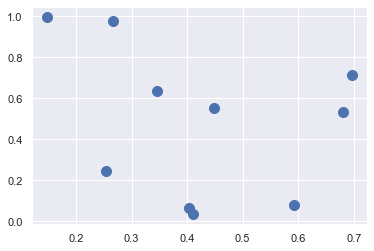

In [35]:
# 예제 : K 최근접 이웃 알고리즘
X = rand.rand(10,2)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s=100);

In [38]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis = -1)
dist_sq.diagonal()
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 5 9 1 8 7 6 2 4 3]
 [1 0 5 8 9 6 7 2 4 3]
 [2 7 8 6 4 3 9 1 0 5]
 [3 4 6 8 2 7 1 0 5 9]
 [4 3 6 8 2 7 1 0 9 5]
 [5 0 9 1 8 7 6 2 4 3]
 [6 8 4 7 2 1 3 0 5 9]
 [7 2 8 6 9 1 0 5 4 3]
 [8 6 7 2 1 4 0 9 5 3]
 [9 5 0 1 7 8 6 2 4 3]]


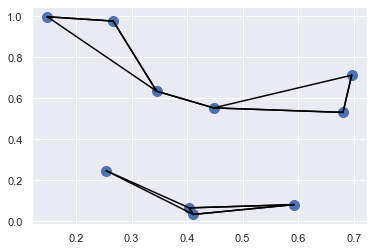

In [42]:
# 각 점을 두 개의 가장 가까운 이웃과 선으로 이음
k = 2
nearest_partition = np.argpartition(dist_sq, k+1,axis=1)
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(X.shape[0]):
    for j in nearest_partition[i, : k+1]:
        plt.plot(*zip(X[j],X[i]), color='black')